In [106]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tempmatch as tm
from obspy import read, UTCDateTime as UTC
from obspy.signal import filter
detectfiles = !ls /media/sda/data/borehole/detections/*.csv
df = pd.DataFrame()
for f in detectfiles:
    try:
        df = pd.concat([df, pd.read_csv(f)])
    except:
        pass
    
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values(by='time')
df['ones'] = 1
df.set_index('time', inplace=True)

def minnaert_radius(freq):
    # https://www.ohio.edu/mechanical/thermo/property_tables/gas/idealGas.html
    gamma = 1.405 # Cv/Cp ratio of specific heats H2 (dimensionless)
    rho = 1000 # (1kg/m^3)
    g = 9.81 # acceleration of gravity (m/s^2)
    h = 7.5 # assumed depth of bubble cavitation from water level (m)
    PA = rho * g * h + 101325 # hydrostatic pressure + atm_pressure (Pa)
    return (1/(2 * np.pi * freq)) * np.sqrt((3 * gamma * PA)/(rho))

In [107]:
minnaert_radius(freq=15*2*np.pi)

0.045850354563911934

In [113]:
df['radius'] = minnaert_radius(freq=15*2*np.pi)

In [114]:
def volume(r):
    return (4/3.)*np.pi*r**3
df['volume'] = df.radius.apply(volume)

Text(0, 0.5, 'Volume ($m^3$)')

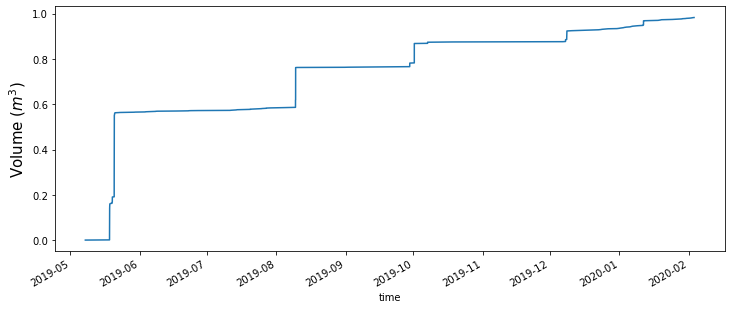

In [115]:
fig, ax = plt.subplots(figsize=(12, 5))

df.volume.cumsum().plot(ax=ax)
ax.set_ylabel(r'Volume ($m^3$)', fontsize=15)

In [116]:
df.volume.sum()

0.982736934409566

In [112]:
1000*9.81*22.5

220725.0

In [62]:
1000*9.81*(7.5)

73575.0

In [5]:
np.mean([1.3, 1.67])

1.4849999999999999